<a href="https://colab.research.google.com/github/akash-agni/DeepLearning/blob/main/Learning_Autoencoders_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train/255.0, x_test/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

11493376/11490434 [==============================] - 0s 0us/step
Number of original training examples: 60000
Number of original test examples: 10000


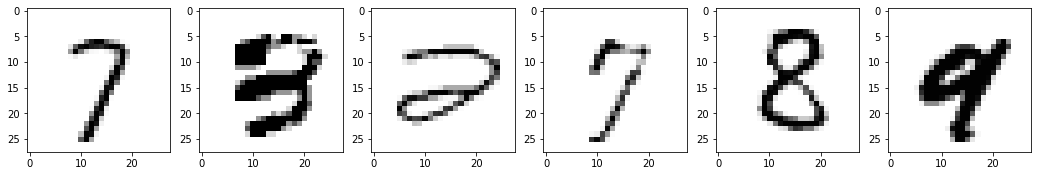

In [3]:
fig, ax = plt.subplots(figsize=(18,6), ncols=6)

for i in range(0, 6):
  idx = np.random.randint(0, len(x_train))
  img = x_train[idx,:,:]
  ax[i].imshow(img, cmap='Greys')

In [149]:
def get_model(input_shape):
  # Encoder Model
  inputs = tf.keras.layers.Input(shape=input_shape)
  x = tf.keras.layers.Dense(256, activation='relu')(inputs)
  x = tf.keras.layers.Dense(128, activation='relu')(x) 
  x = tf.keras.layers.Dense(64, activation='relu')(x)
  x = tf.keras.layers.Dense(32, activation='relu')(x)
  # Decoder Model
  x = tf.keras.layers.Dense(64, activation='relu')(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dense(256, activation='relu')(x)
  outputs = tf.keras.layers.Dense(784, activation='sigmoid')(x)

  model = tf.keras.Model(inputs, outputs)

  return model

In [150]:
X_train = np.reshape(x_train, (len(x_train), 28*28))
X_test = np.reshape(x_test, (len(x_test), 28*28))

In [151]:
model = get_model(X_train.shape[1:])
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_62 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_63 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_64 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_65 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_66 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_67 (Dense)             (None, 128)               8320

In [157]:
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001), loss='binary_crossentropy', metrics='mse')

In [158]:
history = model.fit(x=X_train, y=X_train, batch_size=256, epochs=50, verbose=1, validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1336 - mse: 0.0234 - val_loss: 0.1324 - val_mse: 0.0230
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1340 - mse: 0.0235 - val_loss: 0.1324 - val_mse: 0.0230
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1340 - mse: 0.0235 - val_loss: 0.1324 - val_mse: 0.0230
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1337 - mse: 0.0234 - val_loss: 0.1324 - val_mse: 0.0230
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1338 - mse: 0.0234 - val_loss: 0.1323 - val_mse: 0.0230
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1335 - mse: 0.0234 - val_loss: 0.1323 - val_mse: 0.0230
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1338 - mse: 0.0234 - val_loss: 0.1323 - val_mse: 0.0230
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.

KeyboardInterrupt: ignored

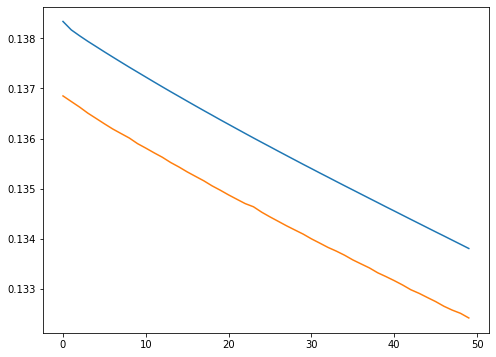

In [159]:
fig, ax = plt.subplots(figsize=(8,6))
epochs = list(range(50))
train_loss = losses = history.history['loss']
val_loss = losses = history.history['val_loss']
ax.plot(epochs, train_loss, label='Training Loss')
fig = ax.plot(epochs, val_loss, label='Validation Loss')

In [173]:
predicted_imgs = model.predict(X_test)

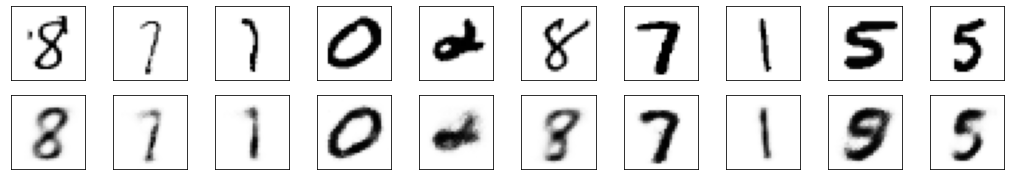

In [178]:
fig, ax = plt.subplots(figsize = (18, 3), nrows= 2, ncols=10)

for i in range(10):
  idx = np.random.randint(0, len(X_test))
  orig_img = X_test[idx].reshape((28,28))
  ax[0][i].imshow(orig_img, cmap='Greys')
  ax[0][i].get_xaxis().set_visible(False)
  ax[0][i].get_yaxis().set_visible(False)

  pred_img = predicted_imgs[idx].reshape((28,28))
  ax[1][i].imshow(pred_img, cmap='Greys')
  ax[1][i].get_xaxis().set_visible(False)
  ax[1][i].get_yaxis().set_visible(False)